In [1]:
### Тут нужно сделать импорты всех необходимых библиотек ###
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # для отрисовки 3D проекции
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

matplotlib.rc("font", size=15) # для увеличения шрифта подписей графиков
from google.colab import drive
from pathlib import Path
drive.mount('/content/drive/')
path = Path('/content/drive/')

Mounted at /content/drive/


In [2]:
phones = pd.read_csv('/content/drive/MyDrive/Python/ML/1.8_phones.csv', encoding='utf-8', header=None) 
phones.head()

,0,1,2,3
0,disk,os,price,year
1,64,Android,7256,2016
2,128,Android,7623,2015
3,64,Android,1916,2010
4,512,iOS,15045,2017


In [3]:
phones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       101 non-null    object
 1   1       101 non-null    object
 2   2       101 non-null    object
 3   3       101 non-null    object
dtypes: object(4)
memory usage: 3.3+ KB


In [4]:
# удалим первую строку таблицы
phones.drop(phones.index[0],  inplace=True)
phones.head()

,0,1,2,3
1,64,Android,7256,2016
2,128,Android,7623,2015
3,64,Android,1916,2010
4,512,iOS,15045,2017
5,16,Android,4478,2013


Видим, что количества памяти, года и цены представляют собой строковые данные, а не числа. Исправляем это.

In [5]:
# Переименуем заголовки столбцов
phones.rename(columns={0: 'disk', 1: 'os', 2: 'price', 3: 'year'}, inplace=True)
phones.head()

,disk,os,price,year
1,64,Android,7256,2016
2,128,Android,7623,2015
3,64,Android,1916,2010
4,512,iOS,15045,2017
5,16,Android,4478,2013


In [6]:
phones['disk'] = phones['disk'].astype(int)
phones['price'] = phones['price'].astype(int)
phones['year'] = phones['year'].astype(int)

In [7]:
phones.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 1 to 100
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   disk    100 non-null    int64 
 1   os      100 non-null    object
 2   price   100 non-null    int64 
 3   year    100 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.9+ KB


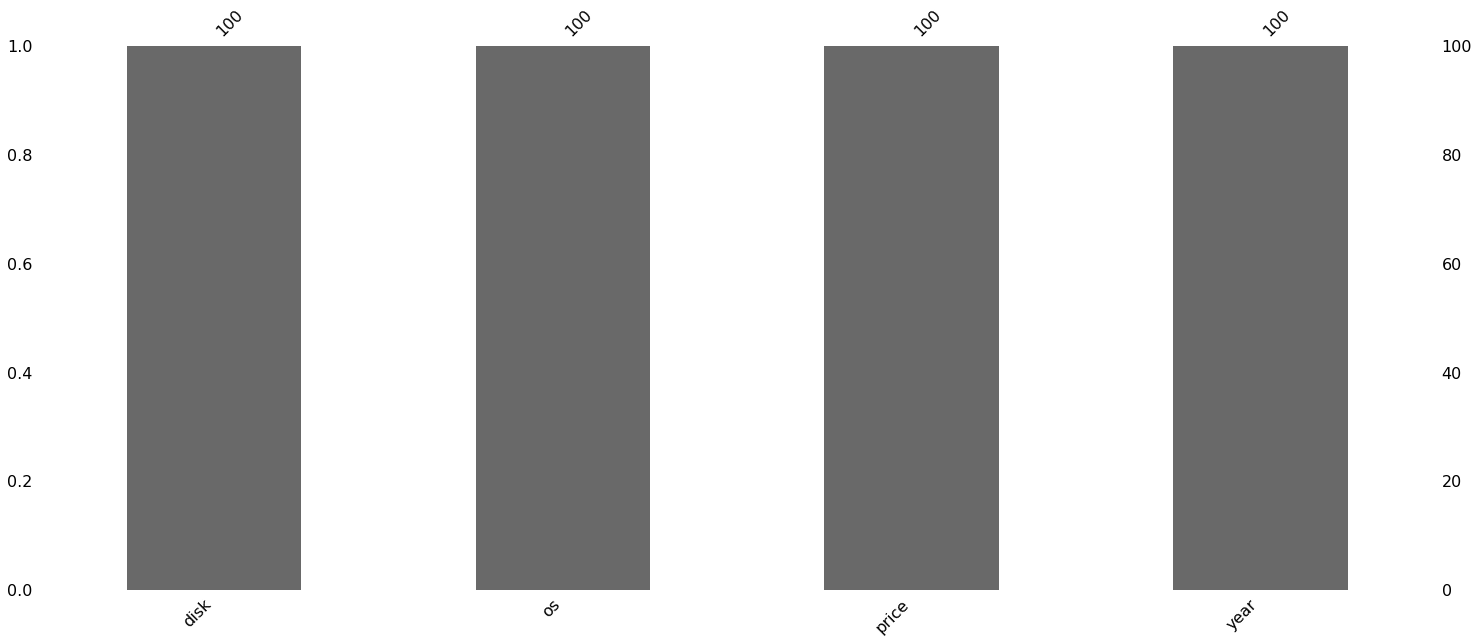

In [8]:
!pip install missingno

import missingno as msno

msno.bar(phones)

In [9]:
phones.describe()

,disk,price,year
count,100.000000,100.000000,100.000000
mean,217.280000,8111.530000,2014.220000
std,193.812055,3540.401993,2.401935
min,16.000000,1435.000000,2010.000000
25%,64.000000,5349.250000,2013.000000
50%,128.000000,7890.500000,2015.000000
75%,512.000000,10358.250000,2016.000000
max,512.000000,15842.000000,2018.000000


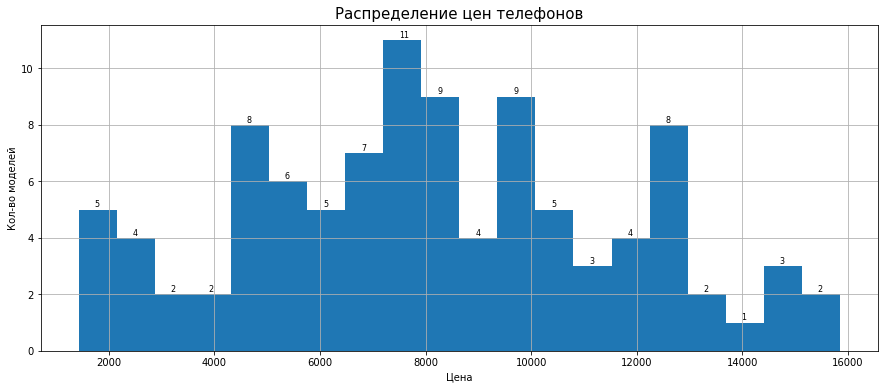

In [11]:
fig, ax = plt.subplots(figsize = (15, 6))
ax.hist(phones['price'], bins = 20)
plt.xlabel('Цена')
plt.ylabel('Кол-во моделей')
plt.title('Распределение цен телефонов', fontsize = 15)
ax.grid()
for i in ax.patches:
    ax.annotate('%1.0f'%(i.get_height()),(i.get_x()+300, i.get_height()+0.1), fontsize = 8)
plt.show()

Удивляемся распределению цен, похожему на нормальное. Посмотрим, как распределены цены на телефоны отдельно для iOS и Android:

In [12]:
iOS = phones[phones['os'] == 'iOS']
iOS.head()

,disk,os,price,year
4,512,iOS,15045,2017
6,512,iOS,15842,2018
9,512,iOS,12797,2015
11,512,iOS,13788,2016
13,512,iOS,9392,2012


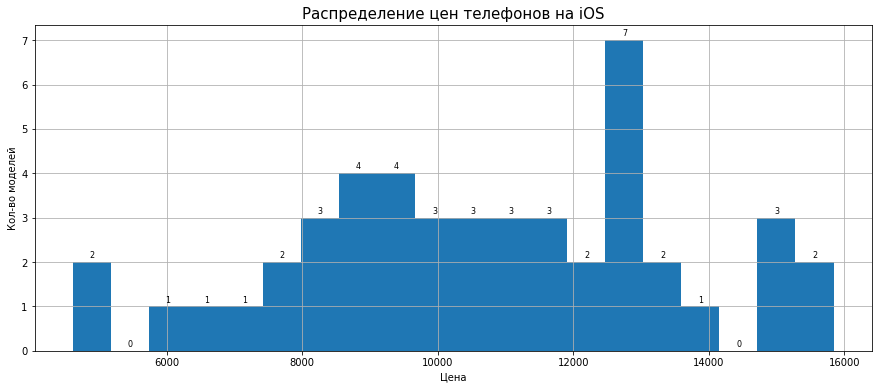

In [15]:
fig, ax = plt.subplots(figsize = (15, 6))
ax.hist(iOS['price'], bins = 20)
plt.xlabel('Цена')
plt.ylabel('Кол-во моделей')
plt.title('Распределение цен телефонов на iOS', fontsize = 15)
ax.grid()
for i in ax.patches:
    ax.annotate('%1.0f'%(i.get_height()),(i.get_x()+250, i.get_height()+0.1), fontsize = 8)
plt.show()

In [17]:
Android = phones[phones['os'] == 'Android']
Android.head()

,disk,os,price,year
1,64,Android,7256,2016
2,128,Android,7623,2015
3,64,Android,1916,2010
5,16,Android,4478,2013
7,128,Android,7191,2015


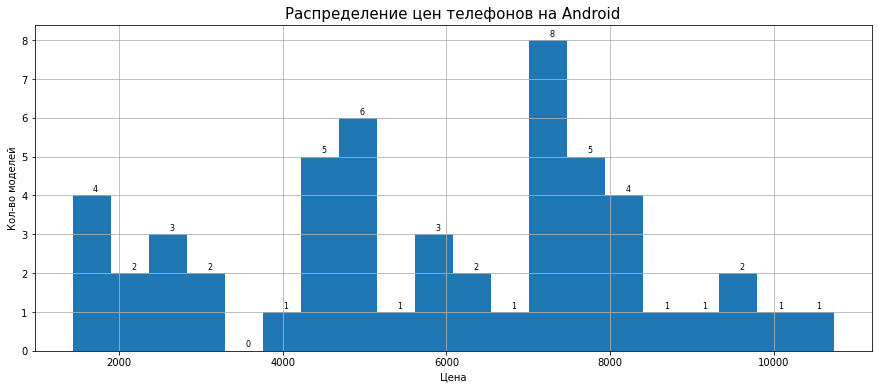

In [18]:
fig, ax = plt.subplots(figsize = (15, 6))
ax.hist(Android['price'], bins = 20)
plt.xlabel('Цена')
plt.ylabel('Кол-во моделей')
plt.title('Распределение цен телефонов на Android', fontsize = 15)
ax.grid()
for i in ax.patches:
    ax.annotate('%1.0f'%(i.get_height()),(i.get_x()+250, i.get_height()+0.1), fontsize = 8)
plt.show()

И посмотрим, есть ли зависимость между ценой телефона и его памятью для каждой из операционных систем:

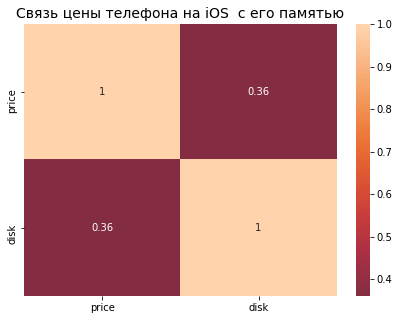

In [19]:
import seaborn as sns

# Выбираем факторы для исследования взаимосвязей
research_list_iOS = ['price', 'disk']
# Запишем корреляционную матрицу в отдельный датафрейм:
corr_m_iOS = iOS[research_list_iOS].corr()

# Визуализируем полученную корреляционную матрицу:
plt.figure(figsize = (7,5))
plt.title("Связь цены телефона на iOS  с его памятью", fontsize=14)
sns.heatmap(corr_m_iOS, center=0, annot = True)

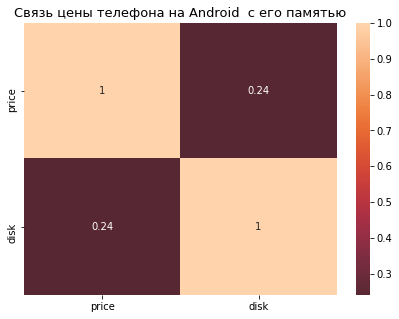

In [20]:
# Выбираем факторы для исследования взаимосвязей
research_list_Android = ['price', 'disk']
# Запишем корреляционную матрицу в отдельный датафрейм:
corr_m_Android = Android[research_list_Android].corr()

# Визуализируем полученную корреляционную матрицу:
plt.figure(figsize = (7,5))
plt.title("Связь цены телефона на Android  с его памятью", fontsize=13)
sns.heatmap(corr_m_Android, center=0, annot = True)

Видим, что в целом цена на телефоны с iOS коррелирует с памятью сильнее, чем цена телефонов с Android.

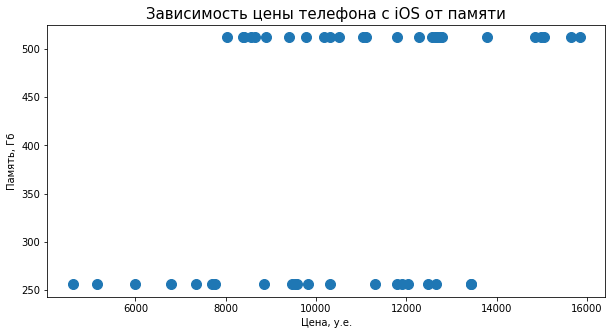

In [21]:
fig = plt.figure(figsize=(10, 5))
ax = plt.axes()
ax.scatter(iOS['price'], iOS['disk'], s = 100)
plt.xlabel('Цена, у.е.')
plt.ylabel('Память, Гб')
plt.title('Зависимость цены телефона с iOS от памяти', fontsize = 15)
plt.show()

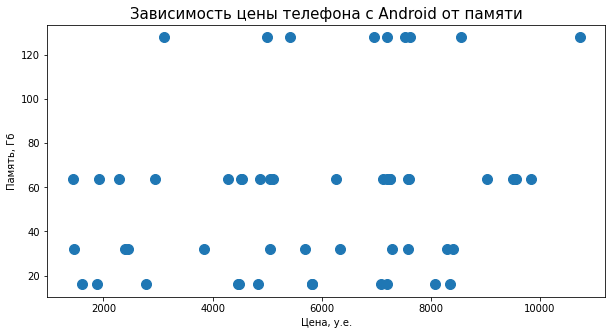

In [22]:
fig = plt.figure(figsize=(10, 5))
ax = plt.axes()
ax.scatter(Android['price'], Android['disk'], s = 100)
plt.xlabel('Цена, у.е.')
plt.ylabel('Память, Гб')
plt.title('Зависимость цены телефона с Android от памяти', fontsize = 15)
plt.show()

In [23]:
!pip install sklearn

Задание 1: обучить модель регрессии

In [24]:
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###

from sklearn.linear_model import LinearRegression
X = iOS[['disk']]
y = iOS['price']

In [25]:
# Создаем регрессор

reg = LinearRegression().fit(X, y)

In [ ]:
# price = price(disk) = a * disk + b | a + b * disk

In [26]:
# вытаскиваем нужные коэффициенты
[b] = reg.coef_
a = reg.intercept_

# создаем функцию для предсказания цены телефона
def reg_prediction(disk):
    return a + b * disk

In [27]:
# используем встроенные методы для расчета предсказаний
reg.predict(X[0:1])[0]

11570.884615384615

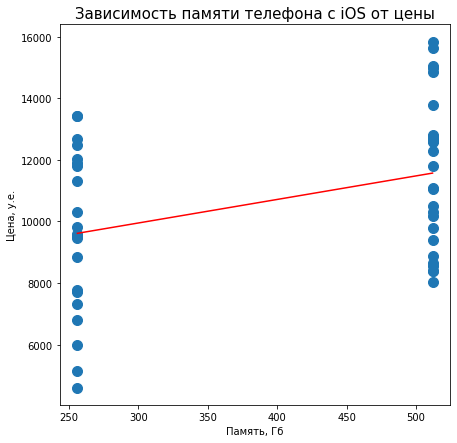

In [28]:
fig = plt.figure(figsize=(7, 7)) # создаем картинку
ax = plt.axes()

# помещаем точки на график
ax.scatter(iOS["disk"], iOS["price"], s=100)
# помещаем предсказания
ax.plot([X.disk.min(), X.disk.max()], [reg_prediction(X.disk.min()), reg_prediction(X.disk.max())], c="red")

# отображаем картинку
plt.xlabel('Память, Гб')
plt.ylabel('Цена, у.е.')
plt.title('Зависимость памяти телефона с iOS от цены', fontsize = 15)
plt.show()

In [29]:
X = Android[['disk']]
y = Android['price']

In [30]:
reg = LinearRegression().fit(X, y)
# вытаскиваем нужные коэффициенты
[b] = reg.coef_
a = reg.intercept_

# используем встроенные методы для расчета предсказаний
reg.predict(X[0:1])[0]

5922.297947908444

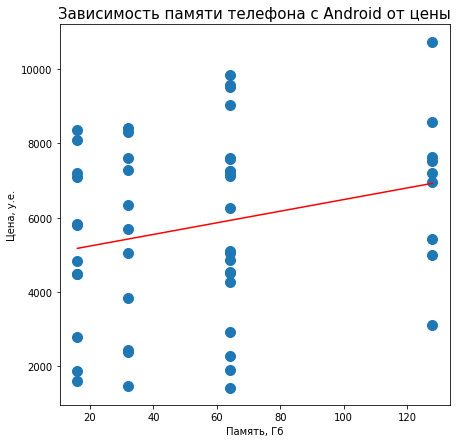

In [31]:
fig = plt.figure(figsize=(7, 7)) # создаем картинку
ax = plt.axes()

# помещаем точки на график
ax.scatter(Android["disk"], Android["price"], s=100)
# помещаем предсказания
ax.plot([X.disk.min(), X.disk.max()], [reg_prediction(X.disk.min()), reg_prediction(X.disk.max())], c="red")

# отображаем картинку
plt.xlabel('Память, Гб')
plt.ylabel('Цена, у.е.')
plt.title('Зависимость памяти телефона с Android от цены', fontsize = 15)
plt.show()

In [32]:
X = phones[['disk']]
y = phones['price']

reg = LinearRegression().fit(X, y)
# вытаскиваем нужные коэффициенты
[b] = reg.coef_
a = reg.intercept_

# используем встроенные методы для расчета предсказаний
reg.predict(X[0:1])[0]

6120.265447090668

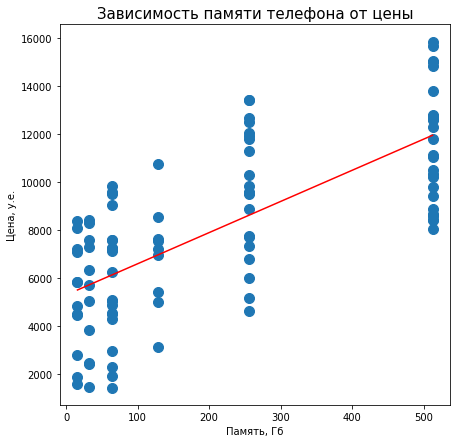

In [33]:
fig = plt.figure(figsize=(7, 7)) # создаем картинку
ax = plt.axes()

# помещаем точки на график
ax.scatter(phones["disk"], phones["price"], s=100)
# помещаем предсказания
ax.plot([X.disk.min(), X.disk.max()], [reg_prediction(X.disk.min()), reg_prediction(X.disk.max())], c="red")

# отображаем картинку
plt.xlabel('Память, Гб')
plt.ylabel('Цена, у.е.')
plt.title('Зависимость памяти телефона от цены', fontsize = 15)
plt.show()

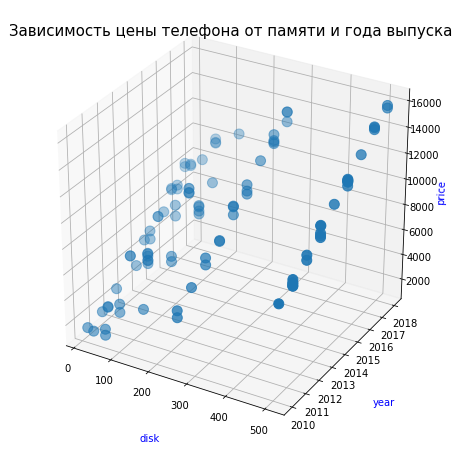

In [34]:
fig = plt.figure(figsize=(8, 8)) # создаем картинку
ax = plt.axes(projection="3d") # устанавливаем проекцию

# помещаем точки на график
ax.scatter(phones["disk"], phones["year"], phones["price"], s=100)

# называем оси
plt.title('Зависимость цены телефона от памяти и года выпуска', fontsize = 15)
ax.set_xlabel("disk", labelpad = 20., color = 'blue')
ax.set_ylabel("year", labelpad = 20., color = 'blue')
ax.set_zlabel("price", color = 'blue')

# отображаем картинку
plt.show()

In [35]:
help(ax.set_ylabel)

Help on method set_ylabel in module matplotlib.axes._axes:

set_ylabel(ylabel, fontdict=None, labelpad=None, **kwargs) method of matplotlib.axes._subplots.Axes3DSubplot instance
    Set the label for the y-axis.
    
    Parameters
    ----------
    ylabel : str
        The label text.
    
    labelpad : scalar, optional, default: None
        Spacing in points from the axes bounding box including ticks
        and tick labels.
    
    Other Parameters
    ----------------
    **kwargs : `.Text` properties
        `.Text` properties control the appearance of the label.
    
    See also
    --------
    text : for information on how override and the optional args work



Задание 2: обучить модель классификации

In [36]:
# импортируем модуль, отвечающий за деревья решений
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

In [37]:
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
X = phones[["year", "disk"]]
y = phones["price"]
cl = DecisionTreeClassifier().fit(X, y)

In [38]:
# выведем информацию для интерпретации построенной модели
print(export_text(cl))

|--- feature_0 <= 2017.50
|   |--- feature_0 <= 2010.50
|   |   |--- feature_1 <= 24.00
|   |   |   |--- class: 1599
|   |   |--- feature_1 >  24.00
|   |   |   |--- feature_1 <= 48.00
|   |   |   |   |--- class: 1464
|   |   |   |--- feature_1 >  48.00
|   |   |   |   |--- feature_1 <= 160.00
|   |   |   |   |   |--- class: 1435
|   |   |   |   |--- feature_1 >  160.00
|   |   |   |   |   |--- feature_1 <= 384.00
|   |   |   |   |   |   |--- class: 4608
|   |   |   |   |   |--- feature_1 >  384.00
|   |   |   |   |   |   |--- class: 8020
|   |--- feature_0 >  2010.50
|   |   |--- feature_1 <= 24.00
|   |   |   |--- feature_0 <= 2011.50
|   |   |   |   |--- class: 1890
|   |   |   |--- feature_0 >  2011.50
|   |   |   |   |--- feature_0 <= 2012.50
|   |   |   |   |   |--- class: 2780
|   |   |   |   |--- feature_0 >  2012.50
|   |   |   |   |   |--- feature_0 <= 2013.50
|   |   |   |   |   |   |--- class: 4473
|   |   |   |   |   |--- feature_0 >  2013.50
|   |   |   |   |   |   |--- f

In [ ]:
# проведем классификацию
cl.predict(X[1:3])[0], y[3]

(6958, 1916)

Задание 3: обучить модель кластеризации

In [41]:
# импортируем модуль, отвечающий за кластеризацию
from sklearn.cluster import KMeans

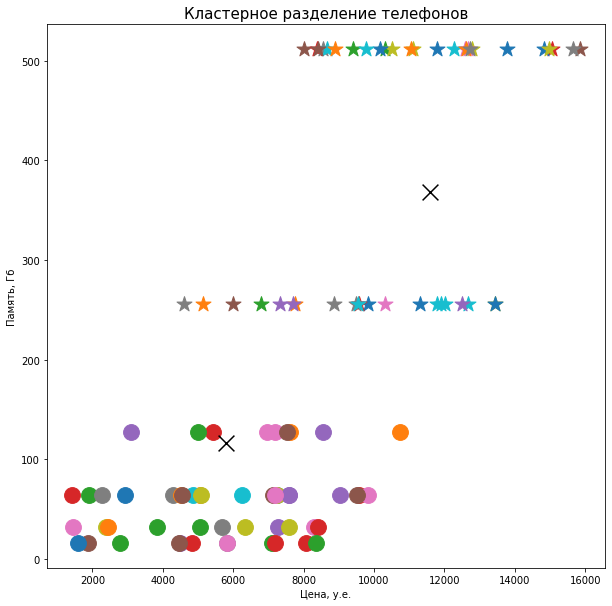

In [44]:
X = phones[["price", "disk"]]
clust = KMeans(n_clusters=2).fit(X)
clust.predict(X[:1])
[c1, c2] = clust.cluster_centers_
fig = plt.figure(figsize=(10, 10)) # создаем картинку

markers = {"Android": "o", "iOS": "*"}
for d1, d2, l in zip(phones.price, phones.disk, phones.os):
    plt.scatter(d1, d2, s=250, marker=markers[l])
# добавляем информацию о центрах кластеров
plt.scatter(c1[0], c1[1], s=250, marker="x", c="black")
plt.scatter(c2[0], c2[1], s=250, marker="x", c="black")
plt.xlabel('Цена, у.е.')
plt.ylabel('Память, Гб')
plt.title('Кластерное разделение телефонов', fontsize = 15)
# отображаем картинку
plt.show()